In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
RANDOM_STATE = 101

### Load Data

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

In [4]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify=y)

#### Balancing dataset

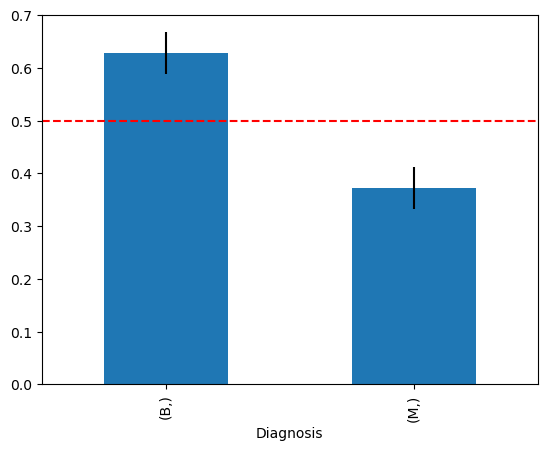

In [5]:
freqs =y.value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

freqs.plot(kind='bar',yerr=std_errors*1.96)

plt.axhline(expected_frequency,color='red',linestyle='--')

### Model

#### Default

In [6]:
knn = KNeighborsClassifier()
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [7]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.93      0.94        72
           M       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

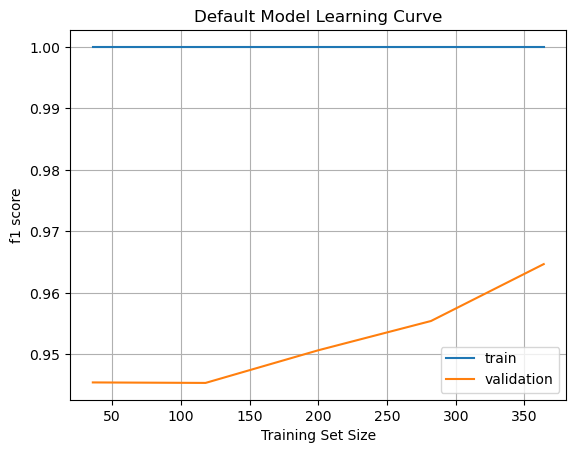

In [9]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Default Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.show()

#### Final Model

In [10]:
knn = KNeighborsClassifier(p=1, n_neighbors=4, leaf_size=1)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])
t0 = time.time()
pipeline.fit(X_train, y_train.values.ravel())
print("Training time:", time.time()-t0)
y_pred = pipeline.predict(X_test)

Training time: 0.0058629512786865234


In [11]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

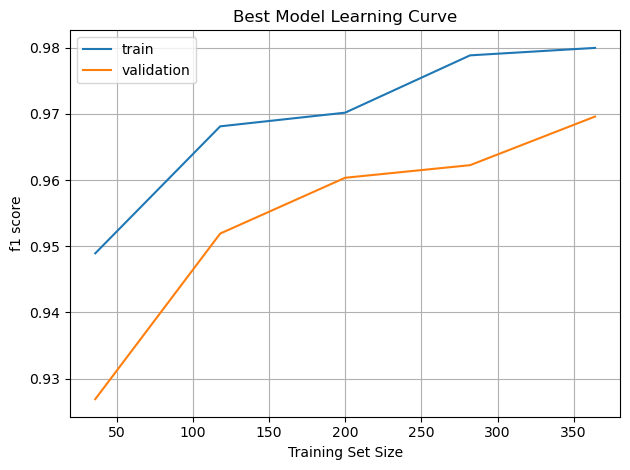

In [13]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)


plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Best Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.savefig('breast_cancer_plots/knn_bc_best_learning_curve.png')
plt.show()

#### Sub/Optimal Learning Curve

In [14]:
# Suboptimal Model
knn = KNeighborsClassifier(n_neighbors=4, p=1, leaf_size=1, weights='distance')
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [15]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        72
           M       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [16]:
# Check false predictions
# print(list(y_test['Diagnosis']))
# print(list(y_pred))

should_be_majority = 0
should_be_minority = 0
for i in range(len(list(y_test['Diagnosis']))):
    if list(y_test['Diagnosis'])[i] == 'B':
        if list(y_test['Diagnosis'])[i] != list(y_pred)[i]:
            should_be_majority += 1
    elif list(y_test['Diagnosis'])[i] == 'M':
        if list(y_test['Diagnosis'])[i] != list(y_pred)[i]:
            should_be_minority += 1
print(should_be_majority)
print(should_be_minority)

3
3


In [17]:
knn = KNeighborsClassifier(n_neighbors=4, p=1, leaf_size=1, weights='distance')
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])

train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

knn = KNeighborsClassifier(p=1, n_neighbors=4, leaf_size=1)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])

train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

# {'model__algorithm': 'auto', 'model__leaf_size': 1, 'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'uniform'}

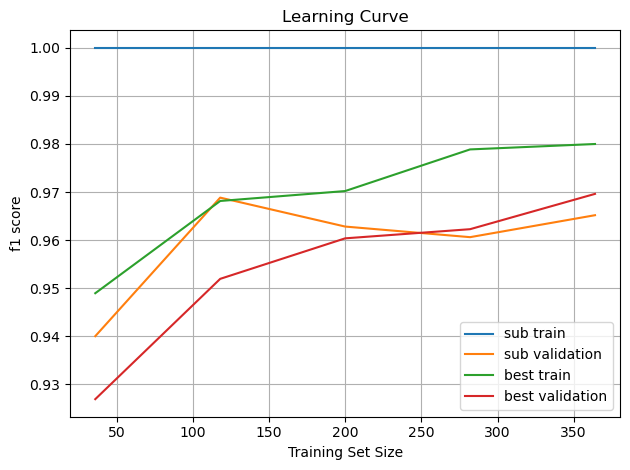

In [18]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)

plt.plot(train_sizes, train_mean, label="sub train")
plt.plot(train_sizes, validation_mean, label="sub validation")
plt.plot(train_sizes1, train_mean1, label="best train")
plt.plot(train_sizes1, validation_mean1, label="best validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.savefig('breast_cancer_plots/knn_bc_combo_learning_curve.png')
plt.show()

### Validation Plot

In [19]:
from sklearn.model_selection import validation_curve
import numpy as np

In [20]:
knn = KNeighborsClassifier()
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])

#### N Neighbors

In [21]:
parameter_range = [*range(0, 25)]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                           param_name="model__n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

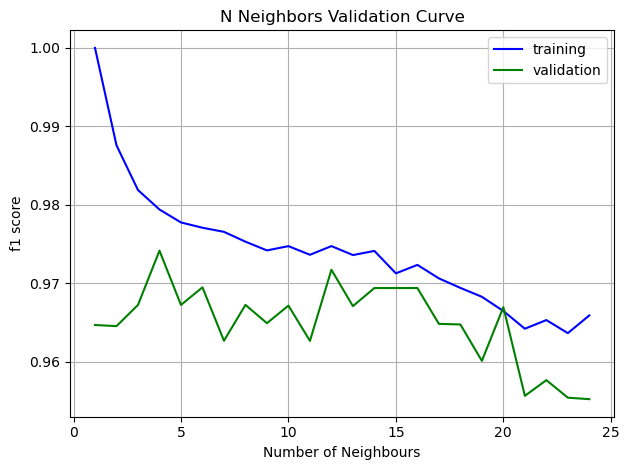

In [22]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("N Neighbors Validation Curve")
plt.xlabel("Number of Neighbours")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('breast_cancer_plots/knn_bc_neighbors_validation.png')
plt.show()

#### Leaf Size

In [23]:
parameter_range = [*range(0, 51)]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                           param_name="model__leaf_size",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

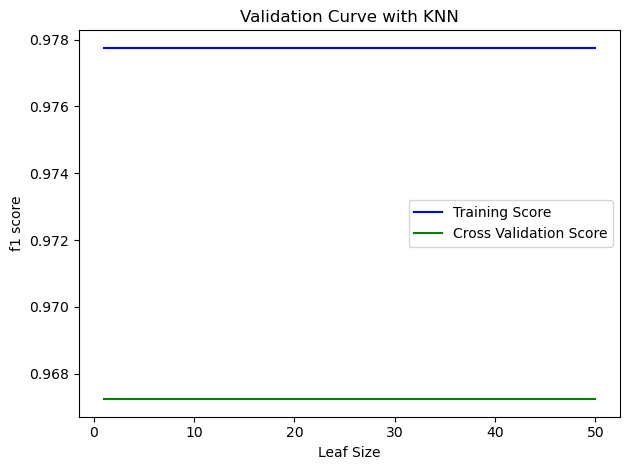

In [24]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')
 
# Creating the plot
plt.title("Validation Curve with KNN")
plt.xlabel("Leaf Size")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

#### p (Power Parameter)

In [25]:
parameter_range = [*range(0, 10)]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                           param_name="model__p",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

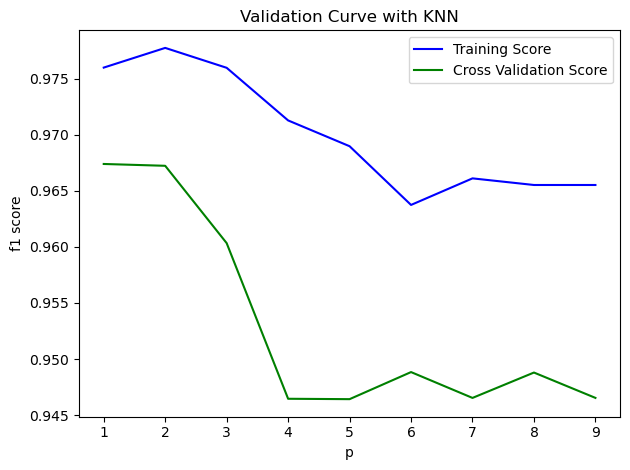

In [26]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')
 
# Creating the plot
plt.title("Validation Curve with KNN")
plt.xlabel("p")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

#### Weights

In [27]:
knn = KNeighborsClassifier()
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])

train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

knn = KNeighborsClassifier(weights='distance')
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])

train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

# knn = KNeighborsClassifier(metric='manhattan')
# sm = SMOTE(random_state=RANDOM_STATE)
# norm = MinMaxScaler()
# pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', knn)])

# train_sizes2, train_scores2, validation_scores2 = learning_curve(
# estimator = pipeline,
# X = X_train,
# y = y_train.values.ravel(), cv = 5,
# scoring = 'f1_macro',
# random_state=RANDOM_STATE)

In [28]:
# print(validation_mean)
# print(validation_mean1)
# print(validation_mean2)

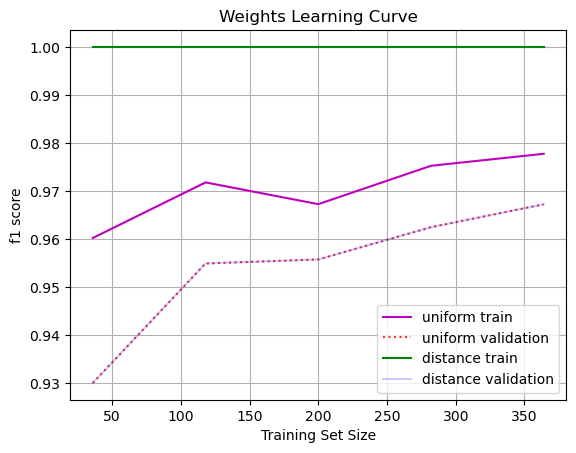

In [29]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)
# train_mean2 = train_scores2.mean(axis=1)
# validation_mean2 = validation_scores2.mean(axis=1)

plt.plot(train_sizes, train_mean, 'm-', label="uniform train")
plt.plot(train_sizes, validation_mean, 'r:', alpha=0.8, label="uniform validation")
plt.plot(train_sizes1, train_mean1, 'g-', label="distance train")
plt.plot(train_sizes1, validation_mean1, 'b-', alpha=0.2, label="distance validation")
# plt.plot(train_sizes2, train_mean1, label="manhattan train")
# plt.plot(train_sizes1, validation_mean1, label="manhattan validation")

plt.title("Weights Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/knn_bc_weights_learning.png')
plt.show()

### Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
knn = KNeighborsClassifier()
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', knn)])
params = [{'model__weights':['uniform', 'distance'],
          'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'model__leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'model__p': [1, 2]}]
grid = GridSearchCV(pipeline,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=5, error_score='raise')
grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'model__algorithm': 'auto', 'model__leaf_size': 1, 'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'uniform'}
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

